In [10]:
import os 
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
gpu = torch.cuda.is_available()

if gpu:
    print('Train on GPU.....')
else:
    print('Train on CPU......')

Train on GPU.....


In [12]:
folder = 'flower_photos/'
train_dir = os.path.join(folder, 'train/')
test_dir = os.path.join(folder, 'test/')

print(folder, train_dir, test_dir)
classes = ['daisy', 'dandelion', 'roses', 'sunflower', 'tulips']

flower_photos/ flower_photos/train/ flower_photos/test/


In [13]:
classes

['daisy', 'dandelion', 'roses', 'sunflower', 'tulips']

In [16]:
transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

print('Number of training images: ', len(train_data))
print('Number of testing images: ', len(test_data))

Number of training images:  3130
Number of testing images:  540


In [17]:
batch = 20
workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, 
                                           num_workers=workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch,
                                          num_workers=workers, shuffle=True)

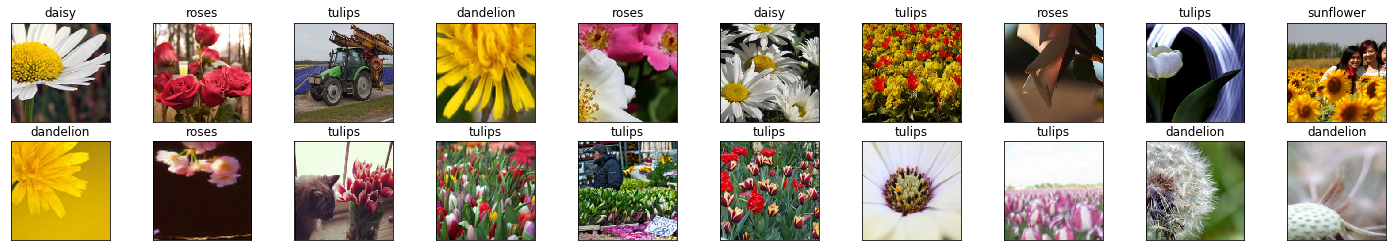

In [18]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

if gpu:
    images = images.cuda()
    
output = vgg16(images)

_, preds_tensor = torch.max(output, 1)

preds = np.squeeze(preds_tensor.numpy()) 
if not gpu:
    else np.squeeze(preds_tensor.cpu().numpy())
    
fig = plt.figure(figsize=25, 4)
